<a href="https://colab.research.google.com/github/neerajviswajith/CE888/blob/main/Lab6/Lab_6_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Task 7 

## Loading Libraries and Data

In [ ]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')

In [ ]:
df1.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df2

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [ ]:
# Preprocessing Data

data = df1.iloc[:,1:].values

In [ ]:
# Data Standardisation

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std                      

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## Identifying Ideal Number of Clusters Using Elbow Method



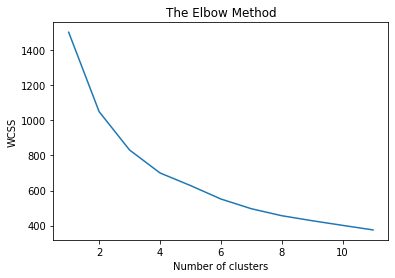

In [ ]:
# Checking for Ideal cluster number.

wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From the above the plot we conclude that, the ideal number of clusters for the given data set is 3. This corresponds to the requirment for the task herein.

## Using hierarchical clustering to the label given dataset. 

In [ ]:
## The methodology used here is adapted from the method used by,
# Tang, John C., and P.A. Salvador. "Classification of countries for international development planning using cluster analysis." Socio-Economic Planning Sciences 20, no. 4 (1986), 237-241. doi:10.1016/0038-0121(86)90015-7
# The Steps of the same involve feature scaling, KMeans++ (for idetifying number of clusters) and hierarchical clustering.

In [ ]:
# Creating 'AgglomerativeClustering' model object and fitting it to scaled dataset

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ac.fit(data_std)
ac.labels_

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2])

In [ ]:
# Processing labels according to serial numbers

df3 = df1.copy()
df3['Labels'] = np.abs(ac.labels_ - 3)
category = {1:'under-developing country', 2:'developing country',3:'developed country'}
df3['Category'] = df3['Labels'].map(category)

In [ ]:
df3.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels,Category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,under-developing country
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2,developing country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,developing country
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2,developing country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2,developing country
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,developing country
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,developing country
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3,developed country
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3,developed country
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2,developing country


In [ ]:
# Creating .csv file

df3.to_csv('development_clustering.csv')